In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load dataset

In [46]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv")

In [53]:
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


#### Data preparation
Select only the following columns: 'engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg'

In [47]:
df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]

In [48]:
df.columns

Index(['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year',
       'fuel_efficiency_mpg'],
      dtype='object')

#### EDA

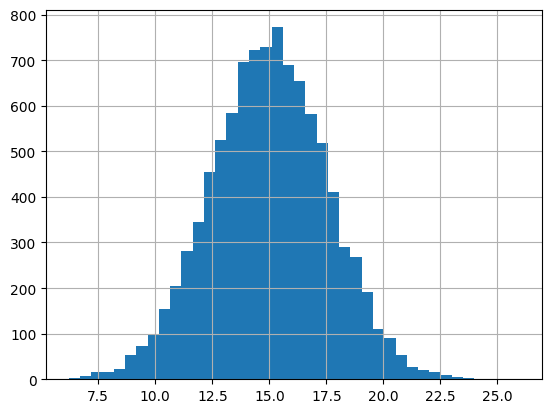

In [49]:
df['fuel_efficiency_mpg'].hist(bins=40)
plt.show()

In [50]:
# Does it have a long tail?  Ans= No
df['fuel_efficiency_mpg'].skew()

np.float64(-0.012062219273507962)

### Question 1
There's one column with missing values. What is it?

In [51]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

### Question 2
What's the median (50% percentile) for variable 'horsepower'?

In [52]:
df.describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


In [54]:
# Shuffle the dataset; seed 42
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [57]:
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209


In [55]:
# Split your data in train/val/test sets, with 60%/20%/20% distribution
n = len(df)
train_end = int(0.6 * n)
val_end = int(0.8 * n)

In [56]:
train_df = df[:train_end]
val_df = df[train_end:val_end]
test_df = df[val_end:]

# size
print("Train:", len(train_df))
print("Validation:", len(val_df))
print("Test:", len(test_df))


Train: 5822
Validation: 1941
Test: 1941


### Question 3
We need to deal with missing values for the column from Q1

In [59]:
# fill it with 0 
train_0 = train_df.copy()
val_0 = val_df.copy()
test_0 = test_df.copy()

train_0['horsepower'] = train_0['horsepower'].fillna(0)
val_0['horsepower'] = val_0['horsepower'].fillna(0)
test_0['horsepower'] = test_0['horsepower'].fillna(0)


In [60]:
# fill it whit mean
mean_hp = train_df['horsepower'].mean()

train_mean = train_df.copy()
val_mean = val_df.copy()
test_mean = test_df.copy()

train_mean['horsepower'] = train_mean['horsepower'].fillna(mean_hp)
val_mean['horsepower'] = val_mean['horsepower'].fillna(mean_hp)
test_mean['horsepower'] = test_mean['horsepower'].fillna(mean_hp)

In [69]:
features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
target = 'fuel_efficiency_mpg'

### Train linear regression model 

In [67]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [75]:
def prepare_data(df, features, target):
    X = df[features].values
    y = df[target].values
    return X, y

In [72]:
def train(df_train, df_val, df_test):
    X_train, y_train = df_train[features].values, df_train[target].values
    X_val, y_val = df_val[features].values, df_val[target].values
    X_test, y_test = df_test[features].values, df_test[target].values
    
    intercept, weights = train_linear_regression(X_train, y_train)
    return intercept, weights

In [93]:
def predict(X, intercept, weights):
    return intercept + X.dot(weights)

In [94]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

#### Using fill with 0 

In [106]:
X_train_0, y_train_0 = prepare_data(train_0, features, target)
X_val_0, y_val_0 = prepare_data(val_0, features, target)
X_test_0, y_test_0 = prepare_data(test_0, features, target)

In [107]:
intercept, weights = train_linear_regression(X_train_0, y_train_0)

In [108]:
print(intercept, weights)

28.81074933083766 [ 9.88022381e-05  3.54195814e-03 -5.01316573e-03  3.51135283e-04]


In [109]:
y_pred_0 = predict(X_train_0, intercept, weights)

In [110]:
y_pred_0

array([17.33513381, 16.29297399, 17.69877193, ..., 16.96501326,
        9.93934888, 17.54537364], shape=(5822,))

In [111]:
rmse_0 = rmse(y_train_0, y_pred_0)

In [112]:
round(float(rmse_0), 2)

0.52

In [113]:
y_pred_val_0 = predict(X_val_0, intercept, weights)

In [114]:
val_rmse_0 = rmse(y_val_0, y_pred_val_0)

In [115]:
round(float(val_rmse_0), 2)

0.52

#### Using with mean

In [116]:
X_train_mean, y_train_mean = prepare_data(train_mean, features, target)
X_val_mean, y_val_mean = prepare_data(val_mean, features, target)
X_test_mean, y_test_mean = prepare_data(test_mean, features, target)

In [117]:
intercept_mean, weights_mean = train_linear_regression(X_train_mean, y_train_mean)

In [118]:
print(intercept, weights)

28.81074933083766 [ 9.88022381e-05  3.54195814e-03 -5.01316573e-03  3.51135283e-04]


In [119]:
y_pred_mean = predict(X_train_mean, intercept_mean, weights_mean)

In [120]:
y_pred_mean

array([17.25897351, 16.1901266 , 17.69237721, ..., 16.8561374 ,
        9.78516302, 17.51662531], shape=(5822,))

In [121]:
rmse_mean = rmse(y_train_mean, y_pred_mean)
round(float(rmse_mean), 2)

0.46

In [122]:
y_pred_val_mean = predict(X_val_mean, intercept_mean, weights_mean)
val_rmse_mean = rmse(y_val_mean, y_pred_val_mean)
round(float(val_rmse_mean), 2)

0.46

In [123]:
print("Train RMSE:", round(rmse(y_train_mean, predict(X_train_mean, intercept_mean, weights_mean)), 2))
print("Validation RMSE:", round(rmse(y_val_mean, predict(X_val_mean, intercept_mean, weights_mean)), 2))


Train RMSE: 0.46
Validation RMSE: 0.46


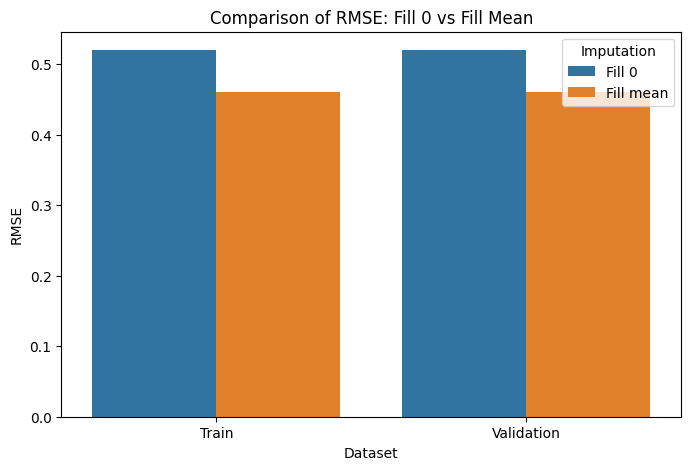

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# RMSEs round
rmse_data = {
    'Dataset': ['Train', 'Validation', 'Train', 'Validation'],
    'RMSE': [
        round(rmse(y_train_0, predict(X_train_0, intercept, weights)), 2),
        round(rmse(y_val_0, predict(X_val_0, intercept, weights)), 2),
        round(rmse(y_train_mean, predict(X_train_mean, intercept_mean, weights_mean)), 2),
        round(rmse(y_val_mean, predict(X_val_mean, intercept_mean, weights_mean)), 2),
    ],
    'Imputation': ['Fill 0', 'Fill 0', 'Fill mean', 'Fill mean']
}

rmse_df = pd.DataFrame(rmse_data)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='Dataset', y='RMSE', hue='Imputation', data=rmse_df)
plt.title('Comparison of RMSE: Fill 0 vs Fill Mean')
plt.ylabel('RMSE')
plt.show()


### Question 4 Regularization

In [128]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [131]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train_0, y_train_0, r=r)
    y_pred = w_0 + X_val_0.dot(w)
    print('%6s' %r, rmse(y_val_0, y_pred))

     0 0.5170592248877097
  0.01 0.5168075789608201
   0.1 0.5185025368483681
     1 0.5220203867976794
     5 0.5226819000483803
    10 0.5227722134465188
   100 0.5228551072227902


### Question 5
 Let's find out how selecting the seed influences our score

In [133]:
def prepare_X(df):
    features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
    X = df[features].values
    return X

In [136]:
rmses = []

for seed in range(10):
    # Shuffle dataset 
    df_shuffled = df.sample(frac=1, random_state=seed)
    
    # Split 60%/20%/20%
    n = len(df_shuffled)
    n_train = int(0.6 * n)
    n_val = int(0.2 * n)
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
    df_test = df_shuffled.iloc[n_train + n_val:].copy()

    # Fill missing values with 0
    for dataset in [df_train, df_val, df_test]:
        dataset['horsepower'] = dataset['horsepower'].fillna(0)

    # Prepare X, y
    X_train = prepare_X(df_train)
    y_train = df_train['fuel_efficiency_mpg'].values

    X_val = prepare_X(df_val)
    y_val = df_val['fuel_efficiency_mpg'].values

    # Train model (no regularization)
    w0, w = train_linear_regression(X_train, y_train)

    # Predict & compute RMSE
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    rmses.append(score)

# --- Compute std ---
std = np.std(rmses)
print("Validation RMSEs:", [round(float(s), 3) for s in rmses])
print("Standard deviation:", round(std, 3))


Validation RMSEs: [0.516, 0.509, 0.516, 0.527, 0.533, 0.518, 0.513, 0.53, 0.507, 0.521]
Standard deviation: 0.008


### Question 6

In [137]:
df_shuffled = df.sample(frac=1, random_state=9)

n = len(df_shuffled)
n_train = int(0.6 * n)
n_val = int(0.2 * n)
n_test = n - n_train - n_val

df_train = df_shuffled.iloc[:n_train]
df_val = df_shuffled.iloc[n_train:n_train + n_val]
df_test = df_shuffled.iloc[n_train + n_val:]


In [138]:
df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)


In [139]:
df_full_train = df_full_train.fillna(0)
df_test = df_test.fillna(0)


In [140]:
X_full_train = prepare_X(df_full_train)
y_full_train = df_full_train['fuel_efficiency_mpg'].values

X_test = prepare_X(df_test)
y_test = df_test['fuel_efficiency_mpg'].values


In [141]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)


In [142]:
y_pred = w0 + X_test.dot(w)
test_rmse = rmse(y_test, y_pred)
print(round(test_rmse, 2))


0.53
